

# Project: Investigate a Dataset tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To complete my Data Analysis project I am using TMDb movies dataset.
This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data

df=pd.read_csv('tmdb-movies.csv')
df.head(2)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [69]:
# Dimention of dataframe row*column for estimating missing data
df.shape

(10866, 21)

In [70]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [71]:
# cherck the number of duplicated rows
sum(df.duplicated())

1

# print concise summery of the dataset
reader.describe()

In [72]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 

#### Drop duplicate rows
There is a duplicate row that should be drop
#### Drop missing data
Based on 10866 total row number we do have some missing data in some rows that we will drop them because the missing data belongs to columns that are not int or float to calculate mean and replace them with mean so we have to drop them.

#### Type conversion
runtime should be Date type instead of string .



In [30]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#first creat a copy of the database
df_clean= df.copy()

In [31]:
# Drope duplicate rows
df_clean.drop_duplicates(inplace=True)

In [32]:
# make sure there is no duplicate rows
sum(df_clean.duplicated())

0

In [33]:
# check the total number of null value for each column
df_clean.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [34]:
# Drop null rows

df_clean.dropna(inplace=True)

In [35]:
# make sure there is no null values in rows

df_clean.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [36]:
# new dimention after dropping missing values
 df_clean.shape

(1992, 21)

In [37]:
pd.to_datetime(df_clean['release_date'])

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
19      2015-11-18
20      2015-05-19
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
27      2015-01-24
28      2015-11-06
29      2015-09-09
30      2015-06-19
31      2015-03-04
34      2015-08-05
           ...    
9992    1990-03-02
10012   1990-05-18
10078   1990-09-07
10094   1990-11-09
10131   2061-12-15
10190   1976-11-05
10213   1976-11-05
10222   1993-11-29
10223   1993-06-11
10224   1993-10-08
10238   1993-12-17
10251   1993-11-11
10255   1993-09-01
10317   1993-01-15
10328   1993-08-07
10338   1993-07-23
10372   1993-10-01
10401   2067-06-12
10438   2063-10-11
10489   1986-05-30
10567   1986-08-29
10594   1973

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Average runtime of the movies

In [38]:
df_clean['runtime'].mean()

106.04016064257029

#### So the average runtime a movie is 106 minutes. Lets visualize it  by graphical approach compare them.

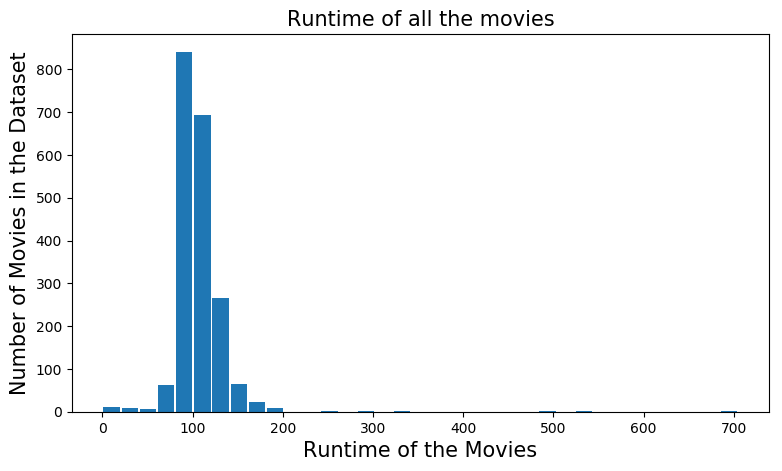

In [39]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df_clean['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

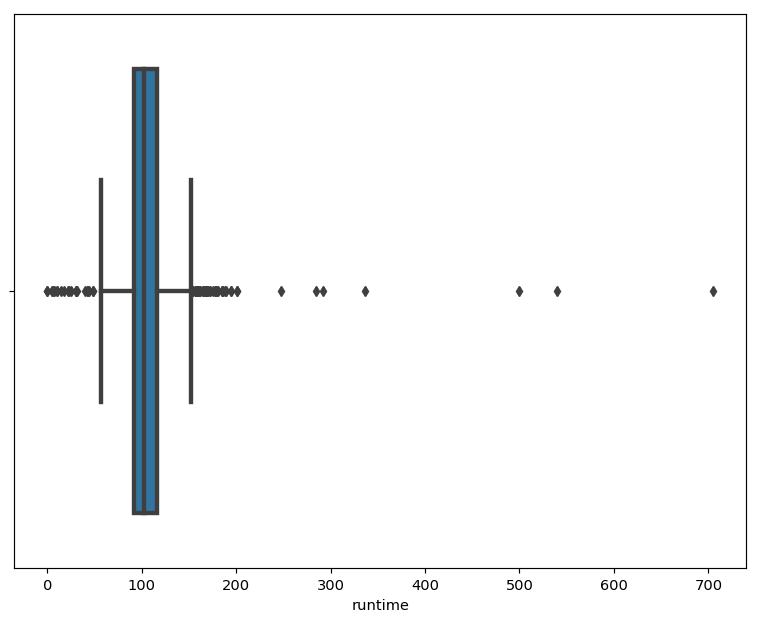

In [40]:
#Box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df_clean['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

#### Great ! By the hightogram and box plot diagrams, we can see that there is almost normal distribution for run times of movies around the average of 106.

### Research Question 2 : Which year has the highest release of movies?

#### I want to know which years has the highest released movies.  I should count the number of movies in each year after groupping the movies by their released year.

release_year
2011    219
2012    145
2013    128
2014    153
2015    165
Name: id, dtype: int64


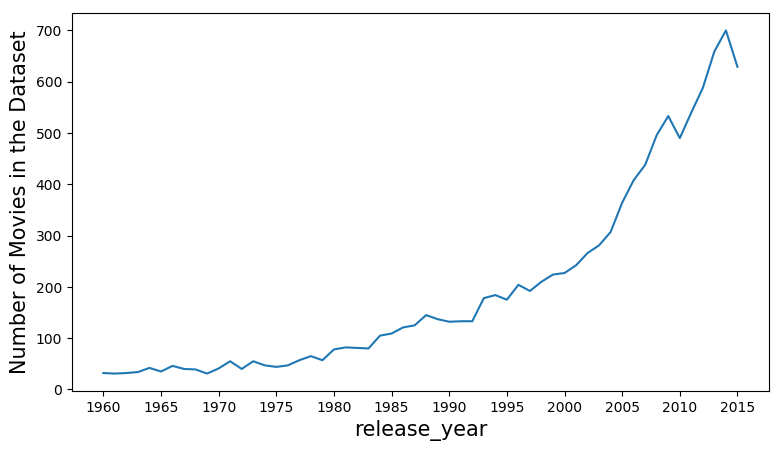

In [41]:
# make group for each year and count the number of movies in each year 
data=df_clean.groupby('release_year').count()['id']
print(data.tail())

#set the figure size and labels
#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Release year', fontsize = 15)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=15)


#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))




#### In this plot, we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

In [42]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df_clean.insert(2,'profit_earned',df_clean['revenue']-df_clean['budget'])

### Research Question 3 : Which year has the highest earn revenue?

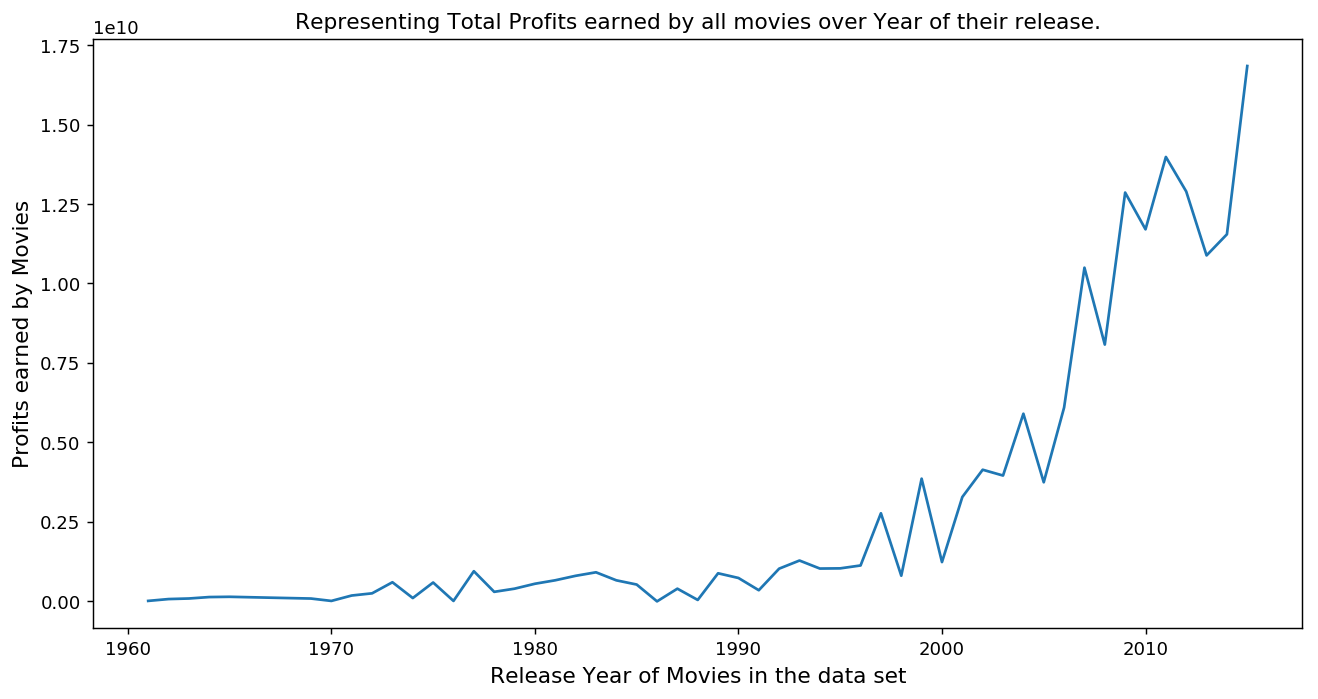

In [43]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year


profits_year = df_clean.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies over Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


#### So we can conclude both graphically that year 2015 was the year where movies made the highest profit. We are now done with analysing the given dataset.We can  find characteristics of profitable movies. 

### Research Question 4 : Which genre has the highest number of movies?

To answer this question, we should split genres columns from '|' to have each genre seperately and add them to a column genre. Then we can find value count of each genre and visualize them.

In [44]:
# split column genres data from character '|' 
# and add them in column genre, each row for each genre

all_genres = df_clean.join(df_clean.genres

               .str.strip('|')


               .str.split('|',expand=True)


               .stack()


               .reset_index(level=1,drop=True)


               .rename('genre')).reset_index(drop=True)


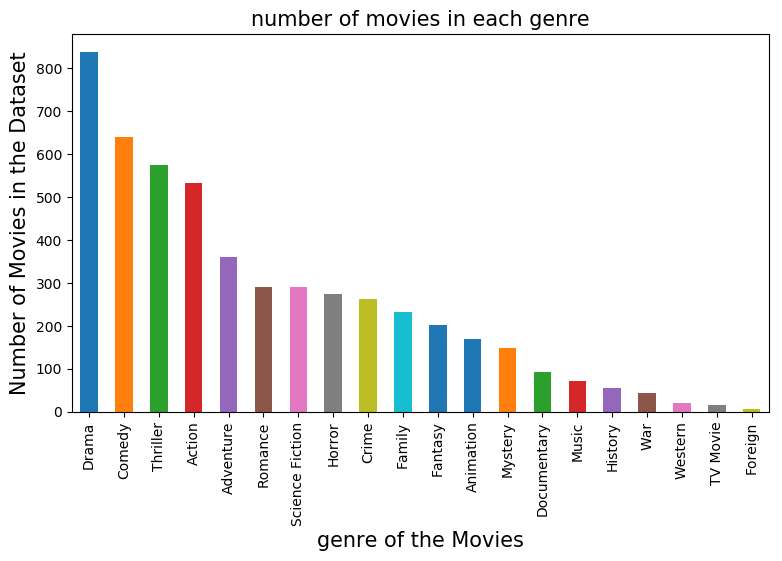

In [45]:

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('genre of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('number of movies in each genre', fontsize=15)
all_genres.genre.value_counts().plot(kind = 'bar')

### Research Question 5: what is the correlation between budget and revenue?

#### how does revenue change according to their budget. By makeing  a scatter plot  between 'revenue' and 'budget' , we can find this correlation.

Text(0.5, 1.0, 'correlation between budget and revenue')

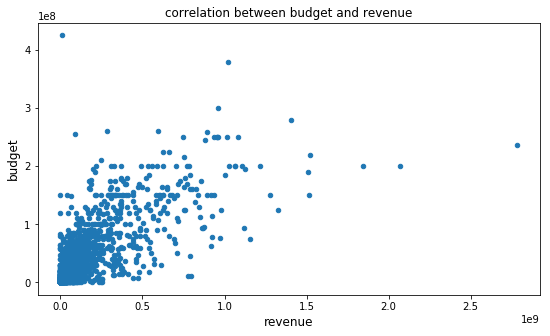

In [47]:
df_clean.plot(kind="scatter", x='revenue', y='budget', figsize=(9,5))


plt.xlabel("revenue", fontsize= 12)
plt.ylabel("budget", fontsize= 12)
plt.title("correlation between budget and revenue", fontsize= 12)



## limitation
Several columns have data seperated by '|' . For better analysis , they should be split from '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.

we have many missing value .Dropping rows with missing value may affect overal analysis.

Budget and revenue column do not have currency unit, different movies from different countries may have different currency unit. So this has importatnt effect on our analysis.

we are not sure if this database contains completel ,correct and up-to-date data. For example , there may be other factors that can be considered to icrease the profit. So our conclusions are not 100 percent reliable, But it shows us that we have high probability of making high profits if we had similar characteristics.

## Conclusions


Drame, Comedy, Thriller , Action  and adventure are five most-made genres.

Maximum Number Of Movies Release In year 2014.

Runtime of all movies almost have normal distribustion around 106.

Revenue is directly connected to the budget, they have possitive correlation.

Movies with higher budgets have shown a corresponding increase in the revenues.


Genre must be : Action, Adventure, Thriller, Comedy, Drama.



